LOADING THE DATASET

In [7]:
import pandas as pd
df=pd.read_csv('/content/allbalanced_dataset.csv')
df.head()

,review,rating
0,for me taking seroquel was a nightmare it incr...,1
1,i wrote of my experience on day and remember j...,1
2,i cannot take this drug without severe side ef...,1
3,the system keep saying theres error occurred e...,1
4,not at all good,1


In [3]:
df.columns

Index(['review', 'rating'], dtype='object')

In [5]:
df['rating']=df['review'].astype(str).str.lower()

In [4]:
df.shape

(15000, 2)

In [8]:
df['rating'].value_counts()

,count
rating,
1,3000
2,3000
3,3000
4,3000
5,3000


SAMPLE REVIEWS

In [9]:
n = 8
for rating in range(1, 6):
    filtered_reviews = df[df['rating'] == rating]['review'].dropna()
    sample_reviews = filtered_reviews.sample(n=min(n, len(filtered_reviews)), random_state=rating)

    # Print results
    print(f"\nShowing {min(n, len(filtered_reviews))} sample review(s) for Rating {rating}:\n")
    for i, review in enumerate(sample_reviews, 1):
        print(f"{i}. {review.strip()}\n")


Showing 8 sample review(s) for Rating 1:

1. diamond lost luster time ago hotel avaliabality busy holiday weekend pm hotels booked beware clue shine gone hope good service updated accomadiations th floor room failure respects furnishings old bed hard floor curtains not open way window bathroom missing pane glass tub just like standing squashy mud carpet worn ceiling tiles mis shaped installed worst extremely rude desk manager not apologize try apease room cleaned checked hotel treated like just number hotel wrong worst breakfast iv seen past breakfast following horrible experience higher management

2. this is good app

3. this people help the bad people to cheating on the answers

4. i have been taking this medicine for about a year i started gaining weight really fast i started feeling really bad all of the time my dr ordered blood tests and much to my suprise my triglycerides which are supposed to be are now at my dr called me the same day and said to stop taking this medicine imme

REMOVING STOPWORDS

In [10]:
%pip install nltk


import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
# Download the 'punkt_tab' resource
nltk.download('punkt_tab')


stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = word_tokenize(str(text))  # tokenize text
    filtered = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered)


df['review']=df['review'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [11]:
stop_words = set(stopwords.words('english'))

# Display total stopwords
print("Total stopwords:", len(stop_words))
print(sorted(stop_words))

Total stopwords: 198
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', '

SAMPLE REVIEWS

In [12]:
n = 5
for rating in range(1, 6):
    # Filter reviews of the current rating
    filtered_reviews = df[df['rating'] == rating]['review'].dropna()

    # Sample 'n' reviews or all if fewer
    sample_reviews = filtered_reviews.sample(n=min(n, len(filtered_reviews)), random_state=rating)

    # Print the results
    print(f"\nShowing {min(n, len(filtered_reviews))} sample review(s) for Rating {rating}:\n")
    for i, review in enumerate(sample_reviews, 1):
        print(f"{i}. {review.strip()}\n")


Showing 5 sample review(s) for Rating 1:

1. diamond lost luster time ago hotel avaliabality busy holiday weekend pm hotels booked beware clue shine gone hope good service updated accomadiations th floor room failure respects furnishings old bed hard floor curtains open way window bathroom missing pane glass tub like standing squashy mud carpet worn ceiling tiles mis shaped installed worst extremely rude desk manager apologize try apease room cleaned checked hotel treated like number hotel wrong worst breakfast iv seen past breakfast following horrible experience higher management

2. good app

3. people help bad people cheating answers

4. taking medicine year started gaining weight really fast started feeling really bad time dr ordered blood tests much suprise triglycerides supposed dr called day said stop taking medicine immediatly im heart problems also dizzy spells loose sense cordination longer drive go medicine really done number wouldnt recommend anyone taking turned life upsi

LEMMATIZATION

In [13]:
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    words = word_tokenize(text)
    lemmatized = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized)
df['review']=df['review'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


SAMPLE REVIEWS

In [14]:
n = 5
for rating in range(1, 6):
    # Filter reviews of the current rating
    filtered_reviews = df[df['rating'] == rating]['review'].dropna()

    # Sample 'n' reviews or all if fewer
    sample_reviews = filtered_reviews.sample(n=min(n, len(filtered_reviews)), random_state=rating)

    # Print the results
    print(f"\nShowing {min(n, len(filtered_reviews))} sample review(s) for Rating {rating}:\n")
    for i, review in enumerate(sample_reviews, 1):
        print(f"{i}. {review.strip()}\n")


Showing 5 sample review(s) for Rating 1:

1. diamond lost luster time ago hotel avaliabality busy holiday weekend pm hotel booked beware clue shine gone hope good service updated accomadiations th floor room failure respect furnishing old bed hard floor curtain open way window bathroom missing pane glass tub like standing squashy mud carpet worn ceiling tile mi shaped installed worst extremely rude desk manager apologize try apease room cleaned checked hotel treated like number hotel wrong worst breakfast iv seen past breakfast following horrible experience higher management

2. good app

3. people help bad people cheating answer

4. taking medicine year started gaining weight really fast started feeling really bad time dr ordered blood test much suprise triglyceride supposed dr called day said stop taking medicine immediatly im heart problem also dizzy spell loose sense cordination longer drive go medicine really done number wouldnt recommend anyone taking turned life upside downread

In [15]:
short_counts = df[df['review'].apply(lambda x: len(str(x).split()) < 3)] \
                .groupby('rating').size().reset_index(name='count_less_than_3_words')

print(short_counts)
long_counts = df[df['review'].apply(lambda x: len(str(x).split()) > 50)] \
               .groupby('rating').size().reset_index(name='count_long_reviews')

print(long_counts)

   rating  count_less_than_3_words
0       1                      355
1       2                      180
2       3                      273
3       4                      300
4       5                      530
   rating  count_long_reviews
0       1                 502
1       2                 824
2       3                 664
3       4                 674
4       5                 282


TRAIN_TEST_SPLIT

In [16]:
from sklearn.model_selection import train_test_split

# Suppose 'df' has columns: 'review' and 'rating'

# Features (X) and labels (y)
X = df['review']
y = df['rating']

# Perform stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Optionally combine X and y back into DataFrames
train_df = pd.DataFrame({'review': X_train, 'rating': y_train})
test_df = pd.DataFrame({'review': X_test, 'rating': y_test})

TF-IDF VECTORIZER

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000) # Removed stop_words='english' as stopwords were already removed
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

LOGISTIC REGRESSION

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.43366666666666664

Classification Report:
               precision    recall  f1-score   support

           1       0.48      0.55      0.51       600
           2       0.39      0.41      0.40       600
           3       0.36      0.28      0.31       600
           4       0.39      0.34      0.36       600
           5       0.52      0.60      0.56       600

    accuracy                           0.43      3000
   macro avg       0.43      0.43      0.43      3000
weighted avg       0.43      0.43      0.43      3000



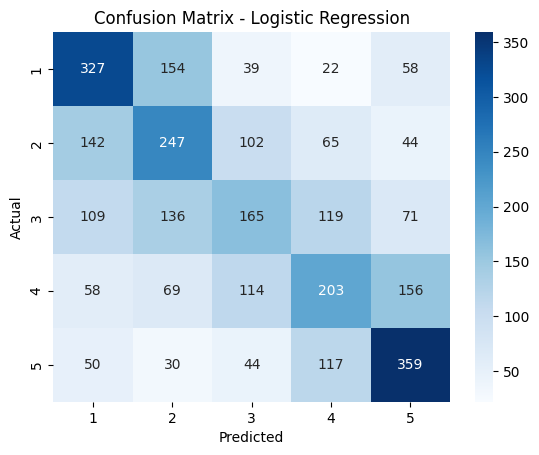

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Train Logistic Regression
log_model = LogisticRegression(
    C=1.0,
    max_iter=1000,
    class_weight='balanced',
    solver='lbfgs',
    multi_class='auto'
)
log_model.fit(X_train_tfidf, y_train)


# Predictions & Evaluation
y_pred = log_model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=sorted(set(y_test)),
            yticklabels=sorted(set(y_test)))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

SUPPORT VECTOR MACHINE (SVM)

Accuracy: 0.40166666666666667

Classification Report:
               precision    recall  f1-score   support

           1       0.47      0.46      0.47       600
           2       0.34      0.37      0.35       600
           3       0.32      0.25      0.28       600
           4       0.36      0.32      0.34       600
           5       0.48      0.61      0.54       600

    accuracy                           0.40      3000
   macro avg       0.39      0.40      0.39      3000
weighted avg       0.39      0.40      0.39      3000



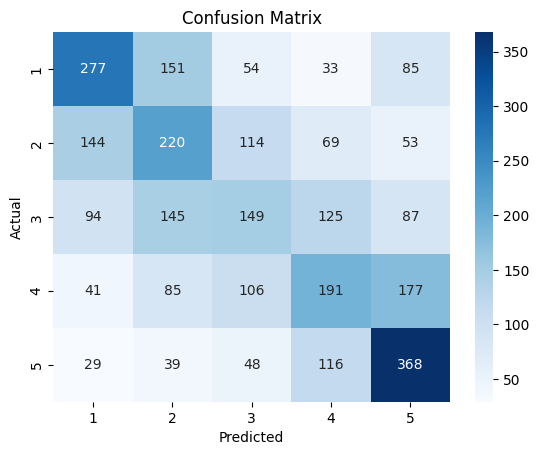

In [19]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train SVM

model = LinearSVC(C=1.0, class_weight='balanced', random_state=42)
model.fit(X_train_tfidf, y_train)


# Predictions & Evaluation

y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=sorted(set(y_test)),
            yticklabels=sorted(set(y_test)))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

RANDOM FOREST

Accuracy: 0.417

Classification Report:
               precision    recall  f1-score   support

           1       0.49      0.41      0.45       600
           2       0.36      0.52      0.42       600
           3       0.35      0.21      0.27       600
           4       0.38      0.31      0.34       600
           5       0.48      0.63      0.55       600

    accuracy                           0.42      3000
   macro avg       0.41      0.42      0.41      3000
weighted avg       0.41      0.42      0.41      3000



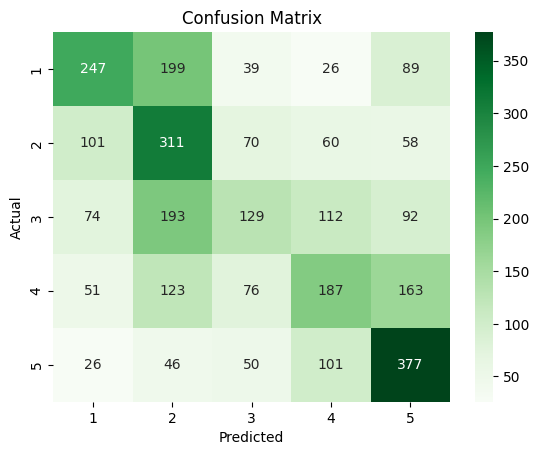

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train_tfidf, y_train)

# Predictions & Evaluation
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=sorted(set(y_test)),
            yticklabels=sorted(set(y_test)))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best Parameters: {'C': 1, 'class_weight': None, 'max_iter': 500, 'solver': 'liblinear'}

Accuracy: 0.43533333333333335

Classification Report:
               precision    recall  f1-score   support

           1       0.48      0.55      0.51       600
           2       0.39      0.42      0.41       600
           3       0.36      0.26      0.31       600
           4       0.39      0.33      0.36       600
           5       0.51      0.61      0.56       600

    accuracy                           0.44      3000
   macro avg       0.43      0.44      0.43      3000
weighted avg       0.43      0.44      0.43      3000



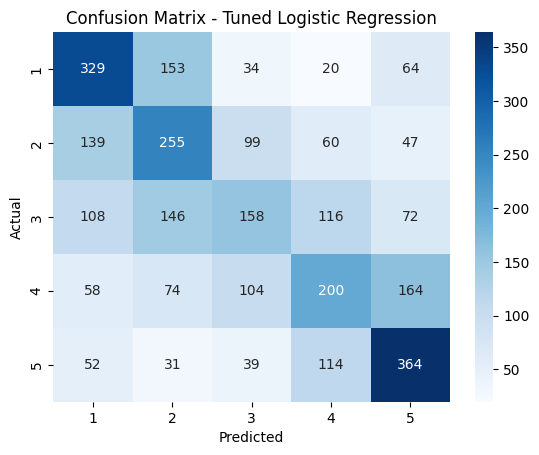

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],                  # Regularization strength
    'max_iter': [500, 1000, 1500],            # Iterations for convergence
    'class_weight': [None, 'balanced'],       # Handling class imbalance
    'solver': ['lbfgs', 'liblinear']          # Solvers for optimization
}

# Initialize base model
log_reg = LogisticRegression(multi_class='auto')

# Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(log_reg, param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)
grid_search.fit(X_train_tfidf, y_train)

# Best parameters and best estimator
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluate on test data
y_pred = best_model.predict(X_test_tfidf)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=sorted(set(y_test)),
            yticklabels=sorted(set(y_test)))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Tuned Logistic Regression")
plt.show()


IMBALANCED MODEL A ...BALANCED

In [22]:
import joblib

Accuracy: 0.4543333333333333

Classification Report:
               precision    recall  f1-score   support

           1       0.50      0.53      0.52       600
           2       0.43      0.38      0.40       600
           3       0.35      0.30      0.33       600
           4       0.41      0.38      0.39       600
           5       0.53      0.69      0.60       600

    accuracy                           0.45      3000
   macro avg       0.45      0.45      0.45      3000
weighted avg       0.45      0.45      0.45      3000



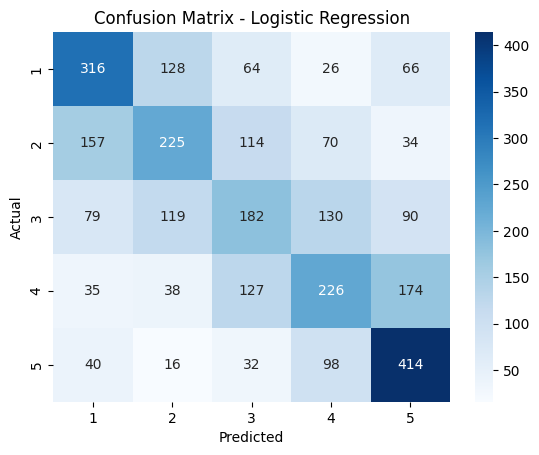

In [24]:
cross_test=joblib.load('model A.pkl')
vectorizer=joblib.load('vectorizer.pkl')
X_test_tfidf = vectorizer.transform(X_test)
y_pred = cross_test.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=sorted(set(y_test)),
            yticklabels=sorted(set(y_test)))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [25]:
joblib.dump(log_model,'model B.pkl')

['model B.pkl']

In [26]:
joblib.dump(vectorizer,'vectorizer2.pkl')

['vectorizer2.pkl']

In [27]:
df.to_csv('BALANCED_TRAIN_TEST.csv',index=False)